# Simple Linear Regression: Confidence- and Prediction-Intervals

This notebook demonstrates how to create confidence and prediction intervals for a linear regression model using Python, based on rental price data (Y) and living area (X).

See also: https://lmc2179.github.io/posts/confidence_prediction.html

## Libraries and Settings

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


## Generate Apartment Data
We will use the provided data representing rental prices (`Y`) and living area (`X`).

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate values for rental_price and living_area
x = np.linspace(45, 160, 25)
y = np.interp(x, [45, 160], [1500, 4900]) + np.random.normal(0, 400, 25)

# Create a new DataFrame with 25 data points
data = pd.DataFrame({
    'rental_price': y,
    'living_area': x
})

df = pd.DataFrame(data)
df.columns = ['rental_price', 'living_area']
df.head()

,rental_price,living_area
0,1698.685661,45.000000
1,1586.360946,49.791667
2,2042.408749,54.583333
3,2534.211943,59.375000
4,1973.005317,64.166667


## Fit an OLS Regression Model
We will use `statsmodels` to fit an ordinary least squares (OLS) regression model for rental price as a function of living area.

                            OLS Regression Results                            
Dep. Variable:           rental_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.66e-11
Time:                        08:42:34   Log-Likelihood:                -181.32
No. Observations:                  25   AIC:                             366.6
Df Residuals:                      23   BIC:                             369.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     561.4882    223.059      2.517      

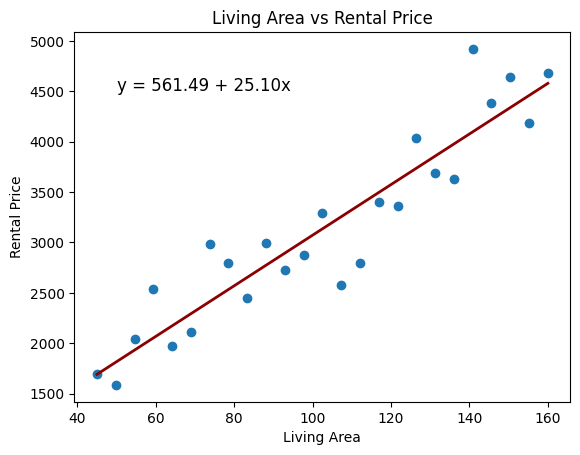

In [3]:
# Fit OLS regression
model = smf.ols('rental_price ~ living_area', data=df)

# Get and show results
results = model.fit()
print(results.summary())

# Plot data and regression line
plt.scatter(df['living_area'], df['rental_price'])
plt.plot(df['living_area'], 
         results.predict(df['living_area']), 
         color='darkred', 
         linewidth=2)
plt.xlabel('Living Area')
plt.ylabel('Rental Price')
plt.title('Living Area vs Rental Price')

# Add annotation (regression equation with f-string)
plt.text(50, 4500, f"y = {results.params[0]:.2f} + {results.params[1]:.2f}x", 
         fontsize=12, color='black')

plt.show()


## Generate Prediction- and Confidence Intervals

We calculate the prediction- and confidence intervals for the model.

In [4]:
# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
predictions.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1691.145599,138.337095,1404.973515,1977.317683,900.530640,2481.760559
1,1811.433197,129.967171,1542.575619,2080.290776,1026.919367,2595.947028
2,1931.720795,121.823875,1679.708909,2183.732682,1152.819298,2710.622293
3,2052.008394,113.955800,1816.272860,2287.743927,1278.219796,2825.796992
4,2172.295992,106.424008,1952.141158,2392.450825,1403.110901,2941.481082


## Visualizing the Regression Line and Confidence Interval

We now plot the observed data along with the regression line and confidence intervals.

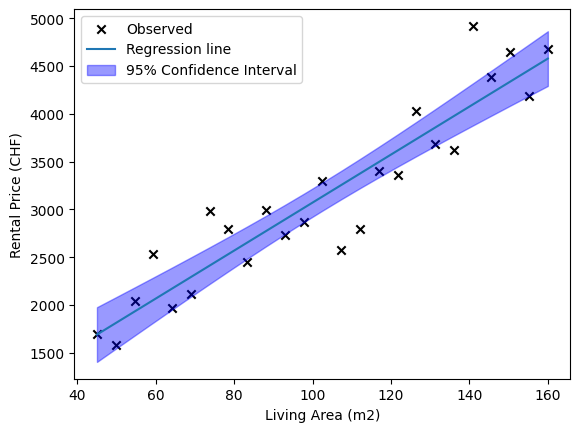

In [5]:
# Plot observed data and regression line
plt.scatter(df['living_area'], 
            df['rental_price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['living_area'], 
         predictions['mean'], 
         label='Regression line')

# Plot confidence intervals
plt.fill_between(df['living_area'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 color='blue', 
                 alpha=0.4, 
                 label='95% Confidence Interval')

# Add legend and labels
plt.xlabel('Living Area (m2)')
plt.ylabel('Rental Price (CHF)')
plt.legend()
plt.show()

## Visualizing the Regression Line and Prediction Interval

We now plot the observed data along with the regression line, confidence- and prediction intervals.

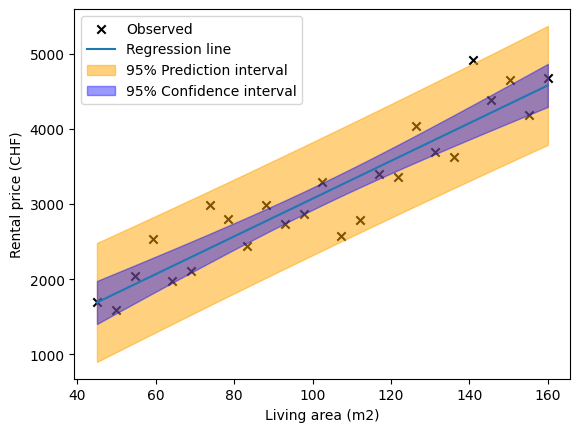

In [6]:
# Plot observed data and regression line
plt.scatter(df['living_area'], 
            df['rental_price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['living_area'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['living_area'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['living_area'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Living area (m2)')
plt.ylabel('Rental price (CHF)')
plt.legend()

# Show plot
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-10-27 08:42:35
Python Version: 3.11.14
-----------------------------------
